<a href="https://colab.research.google.com/github/AofTheProtector/OpenCV/blob/main/OpenCV3_TemplateMatchingipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
farm_img = cv2.imread('farm.png', cv2.IMREAD_UNCHANGED)
wheat_img = cv2.imread('needle.png', cv2.IMREAD_UNCHANGED)

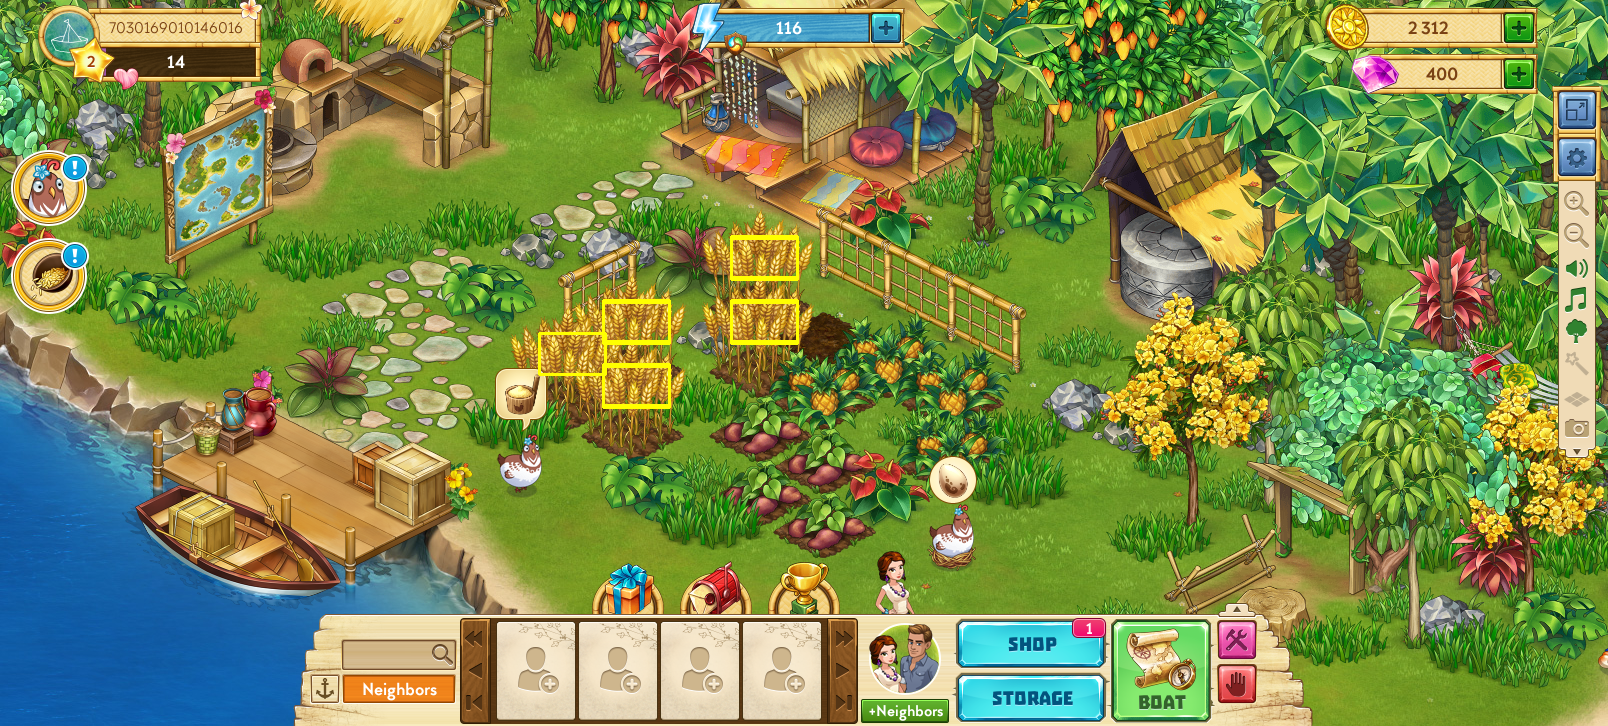

-1

In [ ]:
cv2_imshow(farm_img)
cv2.waitKey()

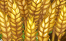

In [ ]:
cv2_imshow(wheat_img)

In [ ]:
result = cv2.matchTemplate(farm_img, wheat_img, cv2.TM_CCOEFF_NORMED)

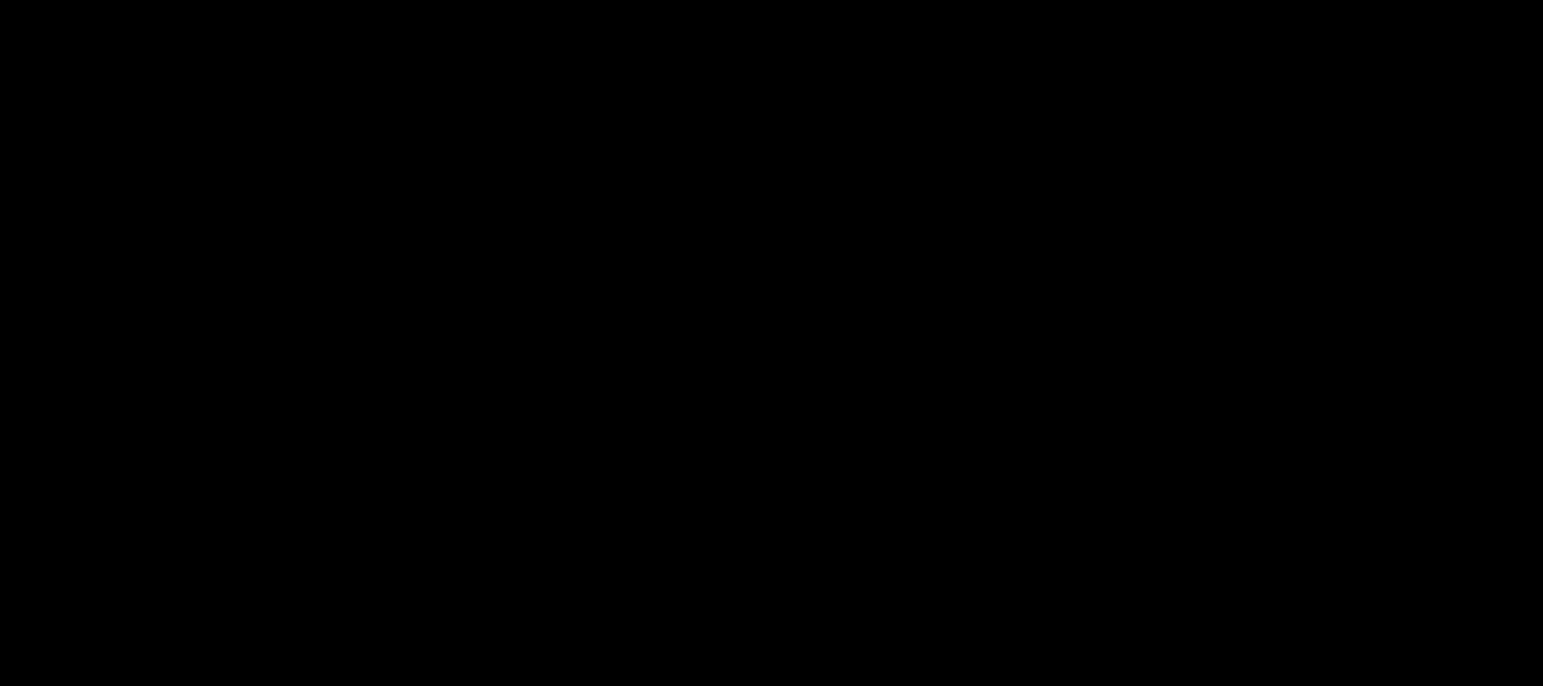

-1

In [ ]:
cv2_imshow(result)
cv2.waitKey()

In [ ]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

In [ ]:
max_loc

(731, 301)

In [ ]:
max_val

0.999998927116394

In [ ]:
w = wheat_img.shape[1]
h = wheat_img.shape[0]

In [ ]:
cv2.rectangle(farm_img, max_loc, (max_loc[0] + w, max_loc[1] + h), (0,255,255), 2)

array([[[ 37, 114,  84],
        [ 55, 130, 102],
        [ 38, 110,  77],
        ...,
        [ 67, 111,  27],
        [ 67, 111,  27],
        [ 53, 111,  18]],

       [[ 36, 121,  78],
        [ 38, 110,  77],
        [ 38, 110,  77],
        ...,
        [ 67, 111,  27],
        [ 67, 111,  27],
        [ 67, 111,  27]],

       [[ 48, 165, 109],
        [ 50, 158,  96],
        [ 36, 121,  78],
        ...,
        [ 67, 111,  27],
        [ 67, 111,  27],
        [ 66, 124,  25]],

       ...,

       [[172,  93,  14],
        [172,  93,  14],
        [172,  93,  14],
        ...,
        [169, 214, 237],
        [171, 216, 239],
        [172, 217, 240]],

       [[173,  94,  15],
        [173,  94,  15],
        [172,  93,  14],
        ...,
        [172, 217, 240],
        [172, 217, 240],
        [173, 215, 239]],

       [[173,  94,  15],
        [173,  94,  15],
        [172,  93,  14],
        ...,
        [172, 214, 238],
        [173, 215, 239],
        [173, 215, 239]]

In [ ]:
threshold = .60
yloc, xloc = np.where(result >= threshold)

In [ ]:
len(xloc)

13

In [ ]:
for (x, y) in zip(xloc, yloc):
  cv2.rectangle(farm_img, (x, y), (x + w, y + h), (0,255,255), 2)

In [ ]:
# What is a rectangle?
# x, y, w, h
rectangles = []
for (x, y) in zip(xloc, yloc):
  rectangles.append([int(x), int(y), int(w), int(h)])
  rectangles.append([int(x), int(y), int(w), int(h)])

In [ ]:
len(rectangles)

26

In [ ]:
rectangles, weights = cv2.groupRectangles(rectangles, 1, 0.2)

In [ ]:
len(rectangles)

5

In [ ]:
for (x, y, w, h) in rectangles:
  cv2.rectangle(farm_img, (x,y), (x + w, y + h), (0,255,255), 2)

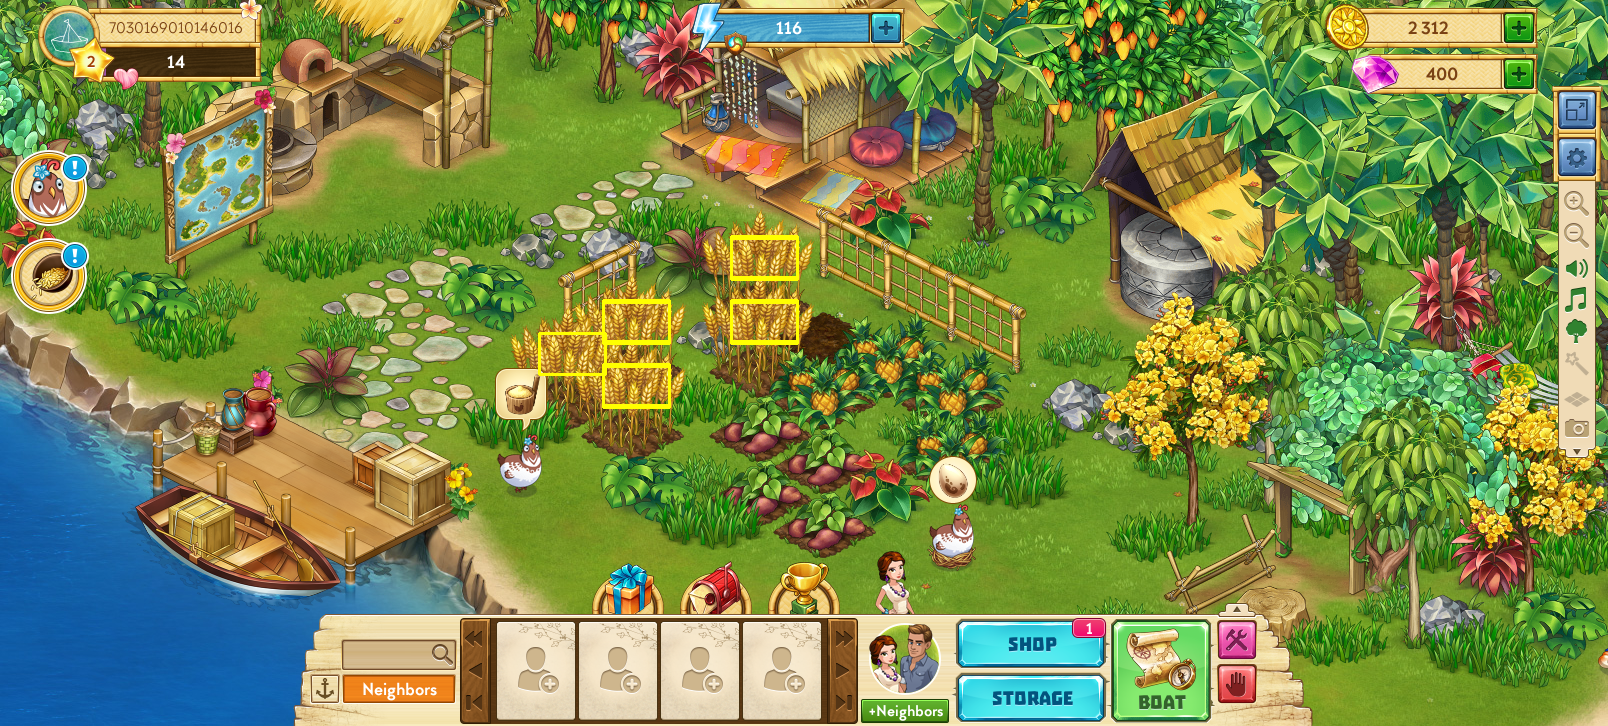

-1

In [ ]:
cv2_imshow(farm_img)
cv2.waitKey()